# JORGE NAVARRO GONZÁLEZ - MARIO UBIERNA SAN MAMÉS

## Práctica 8 - MODELO DE RED ALEATORIA DE GILBERT

In [25]:
#Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import random as random
import numpy as np
import itertools
from scipy import stats

#### 1 Modelo Gilbert (1959)

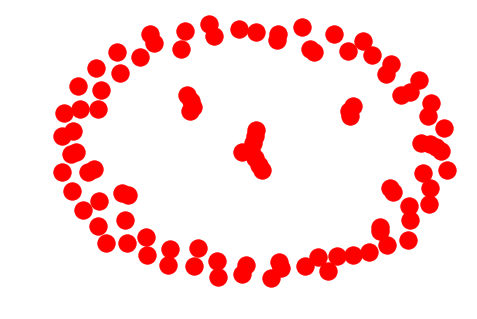

In [66]:
# 1.1 Implementar en una función de python el algoritmo de generación de redes aleatorias de Gilbert G(N,p)

def generar_probabilidad():
    return random.uniform(0,1)

def gilbert(probabilidad, nodos=10):
    
    G = nx.Graph(nombre='grafo') 
    G.add_nodes_from(list(range(nodos)))
    
    for i in itertools.combinations(list(range(nodos)), 2):    
        if generar_probabilidad() < probabilidad:
            G.add_edge(i[0],i[1])
    return G

G = gilbert(0.005, 100)
nx.draw(G)

In [67]:
# 1.2 Para una red generada mediante el modelo anterior G(100,0.005) calcular los estadísticos:
n_nodos = G.number_of_nodes()
n_enlaces  = G.number_of_edges()
grados_nodos = []
gradoMedio = 0
gradoMaximo = 0
clustering_medio = nx.average_clustering(G)

for nodo in G.nodes():
    gradoMedio += G.degree(nodo)
    grados_nodos.append(G.degree(nodo))
    
print("El número de nodos son: " +str(n_nodos))
print("El número de enlaces son: "+str(n_enlaces))
print("El grado medio es: " +str(sum(grados_nodos)/n_nodos))
print("El grado máximo es: " + str(max(grados_nodos)))
print("El grado mínimo es: " + str(min(grados_nodos)))
print("El grado medio de clustering es: " + str(clustering_medio))

El número de nodos son: 100
El número de enlaces son: 24
El grado medio es: 0.48
El grado máximo es: 3
El grado mínimo es: 0
El grado medio de clustering es: 0.0


#### 2 Distribución de grado

(array([70.,  0.,  0., 23.,  0.,  0.,  6.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

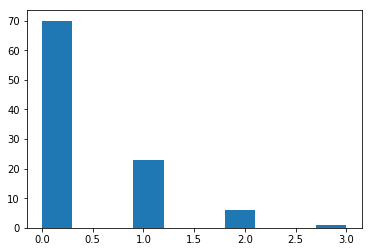

In [30]:
# 2.1 2.1 Represente la distribución de grado de distintas realizaciones del modelo G(100,p) para los siguientes valores de p={0.005,0.05,0.5}. ¿Qué distribución de probabilidad sigue la distribución de grado?

def grados_nodos(G):
    grados = []
    for nodo in G.nodes():
        grados.append(G.degree(nodo))
    return grados

# Representación de la distribución para 100 nodos y p=0.005
G = gilbert(0.005, 100)
plt.hist(grados_nodos(G))


(array([ 4., 13., 12., 20., 15., 20., 11.,  2.,  1.,  2.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

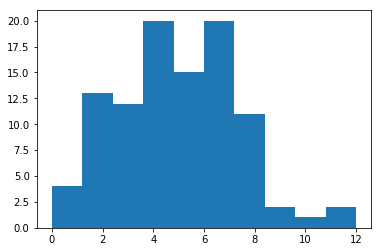

In [31]:
# Representación de la distribución para 100 nodos y p=0.05
G = gilbert(0.05, 100)
plt.hist(grados_nodos(G))

(array([ 3.,  3.,  9., 12., 24., 24., 12., 12.,  0.,  1.]),
 array([35. , 37.9, 40.8, 43.7, 46.6, 49.5, 52.4, 55.3, 58.2, 61.1, 64. ]),
 <a list of 10 Patch objects>)

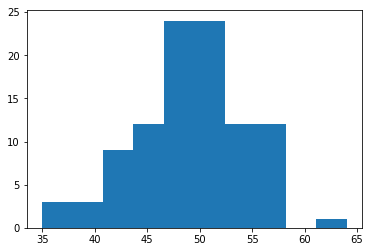

In [32]:
# Representación de la distribución para 100 nodos y p=0.5
G = gilbert(0.5, 100)
plt.hist(grados_nodos(G))

In [33]:
# ¿Qué distribución de probabilidad sigue la distribución de grado?
# Sigue la distribución de Poisson, ya que nos permite determinar el número de hechos que se pueden producir
# en un intervalo, bajo una cierta aleatoriedad.

#### 3 Aparición del componente gigante